<div align="right" style="text-align: right"><i>Peter Norvig, Oct 2017<br>Data updated regularly</i></div>

# Bicycling Statistics

During a pandemic, bicycling is a great way to (1) spend some time, (2) get some exercise, (3) stay outside and be safe, and (4) track how you are progressing against your goals. My data comes from [Strava](https://www.strava.com/athletes/575579). At various times I've had various goals:
- **Distance**: I do about 6,000 miles a year.
- **Climbing**: In 2022, I climbed to *space* (100 km of total elevation gain).
- **Explorer Tiles**: In 2022, I started tracking the 1-mile-square [explorer tiles](https://rideeverytile.com/) I have visited.
- **Wandering**: In 2020, I started using [Wandrer.earth](https://wandrer.earth/athletes/3534/) to track what new roads I have ridden.
- **Eddington Number**: I've done 67 miles or more on 67 different days. So 67 is my Eddington Number.
- **Speed**: I'm not going particularly fast, but I am interested in understanding how my speed varies with the steepness of the hill.

This notebook is mostly for my own benefit, but if you're a cyclist you're welcome to adapt it to your own data, and if you're a data scientist, you might find it an interesting example of exploratory data analysis.  The companion notebook [**BikeCode.ipynb**](BikeCode.ipynb) has the implementation details.

# Yearly Totals

Here are my overall stats for each year since I started keeping track in mid-2014. I have done 6,000 miles per year since 2016, except for 2020 when an injury kept me sidelined for two months. The columns keep track of speed/distance (**mph** is the speed, computed as the quotient of **miles* and **hours**; **kms** is the metric conversion of **miles**) and climbing (**feet** is the total height climbed (or **km_up** in metric), **vam** is vertical meters ascended per hour, **fpm** is average feet ascended per mile and **pct** is average grade of climbing (**fpm** × 100 / 5280).


In [92]:
%run BikeCode.ipynb

yearly

,year,hours,miles,feet,mph,vam,fpm,pct,kms,km_up
,2022,532.93,6028,362323,11.31,207.0,60.0,1.14,9699.05,110.4
,2021,490.53,6064,196634,12.36,122.0,32.0,0.61,9756.98,59.9
,2020,438.88,5341,94777,12.17,66.0,18.0,0.34,8593.67,28.9
,2019,476.32,6016,149797,12.63,96.0,25.0,0.47,9679.74,45.7
,2018,475.93,6101,158642,12.82,102.0,26.0,0.49,9816.51,48.4
,2017,567.33,7356,202096,12.97,109.0,27.0,0.52,11835.80,61.6
,2016,486.38,6339,201453,13.03,126.0,32.0,0.60,10199.45,61.4
,2015,419.95,5452,209859,12.98,152.0,38.0,0.73,8772.27,64.0
,2014,191.03,2469,118481,12.92,189.0,48.0,0.91,3972.62,36.1


And here's the same data on a daily basis, assuming 350 days of riding in a year:

In [93]:
daily

,year,hours,miles,feet,mph,vam,fpm,pct,kms,km_up
,2022,1.5,17.2,1035.2,11.31,207.0,60.0,1.14,27.7,0.315
,2021,1.4,17.3,561.8,12.36,122.0,32.0,0.61,27.9,0.171
,2020,1.3,15.3,270.8,12.17,66.0,18.0,0.34,24.6,0.083
,2019,1.4,17.2,428.0,12.63,96.0,25.0,0.47,27.7,0.131
,2018,1.4,17.4,453.3,12.82,102.0,26.0,0.49,28.0,0.138
,2017,1.6,21.0,577.4,12.97,109.0,27.0,0.52,33.8,0.176
,2016,1.4,18.1,575.6,13.03,126.0,32.0,0.60,29.1,0.175
,2015,1.2,15.6,599.6,12.98,152.0,38.0,0.73,25.1,0.183
,2014,0.5,7.1,338.5,12.92,189.0,48.0,0.91,11.4,0.103


# Climbing 

In 2022 my friend [A. J. Jacobs](https://ajjacobs.com/)  set a goal of **walking to space**: climbing a total elevation equal to the distance from the Earth's surface to the top of the atmoshere. [A group](https://www.facebook.com/groups/260966686136038) of about 40 of us joined the quest. The boundary of "space" is vague, but could is often reckoned as  either 100 km (the [Kármán line](https://en.wikipedia.org/wiki/K%C3%A1rm%C3%A1n_line)) or [50 miles](https://science.nasa.gov/edge-space); in 2022 I surpassed 100 kilometers of climbing (over 1,000 feet per day), but most years I'm closer to 60 kilometers (about 600 feet per day).

# Explorer Tiles


The [OpenStreetMap](https://www.openstreetmap.org/) world map is divided into **[explorer tiles](https://www.statshunters.com/faq-10-what-are-explorer-tiles)** of approximately 1 mile square.  Sites like [Veloviewer](https://veloviewer.com) and [Statshunter](https://www.statshunters.com/) challenge bicyclist/hikers to record which tiles they have passed through. The process is gamified to highlight the following statistics:
- The largest **square** (an *n* × *n* array of visited ties). 
- The maximum **cluster** (a set of contiguous interior visited tiles, where "interior" means surrounded by visited tiles).
- The **total** number of visited tiles.
 

Since I live on a penninsula, it is not easy for me to form a large square, and I sometimes have to work hard to connect different parts of my map (such as connecting San Francisco and Marin). I have a [separrate page]() documenting my explorations, but here are a few key points along the way:

In [94]:
tiles

,date,square,cluster,total,comment
,06/30/2023,13,689,2640,Rides in east Bay
,04/14/2023,13,630,2595,Black Sands Beach connects Marin to max cluster
,03/04/2023,13,583,2574,Almaden rides connects Gilroy to max cluster
,10/22/2022,13,396,2495,Alviso levees to get to 13x13 max square
,10/16/2022,12,393,2492,Milpitas ride connects East Bay to max cluster
,09/08/2022,11,300,2487,First started tracking tiles


# Wandering 

The website [**Wandrer.earth**](https://wandrer.earth) tracks the  distinct roads a user has biked on. It provides a fun incentive to get out and explore new roads. The site is gamified in a way that there is a reward for first reaching 25% of the road-miles in each city, and further rewards for higher percentages.  (You get no credit for repeating a road you've already been on.) 

The wandrer.earth site does a good job of showing my current status, but it requires clicking around a bit, so I summarize it all in one place here.  Each line gives the county (e.g. SMC for San Mateo County); city preceeded by the percentage of roads I've rode there; miles rode/total miles in city; and miles to go to the next big reward level.

In [95]:
wandering(by='pct')

SMC 100.0% Los Trancos OSP                0.3/0.3 mi 
SMC  99.9% Los Trancos Woods              5.3/5.3 mi 
SMC  99.9% Menlo Oaks                     3.5/3.5 mi 
SMC  99.9% Kensington Square              0.6/0.6 mi 
SMC  99.9% Ladera                         8.1/8.1 mi 
SMC  99.9% Palomar Park                   4.0/4.0 mi 
SMC  99.8% North Fair Oaks                  27/27 mi 
SMC  99.8% Emerald Lake Hills               25/25 mi 
SMC  99.8% West Menlo Park                  11/11 mi 
SMC  99.8% Atherton                         56/56 mi 
SMC  99.7% Sequoia Tract                    11/11 mi 
SCC  99.6% Los Altos                      138/138 mi 
SCC  99.6% Loyola                           18/18 mi 
SMC  99.6% East Palo Alto                   48/48 mi 
SMC  99.5% Menlo Park                     139/140 mi 
SMC  99.5% Woodside                         75/75 mi 
SMC  99.5% Portola Valley                   48/48 mi 
SMC  99.4% Sky Londa                        12/12 mi 
SCC  99.4% Los Altos Hills  

As part of my wandering, in April 2022 I was able to get to 25% of every city that  rings the San Francisco Bay and is below San Francisco or  Oakland (see map [with](ring2.jpeg) or [without](ring1.jpeg) roads traveled; as soon as you get 25% of a city, it lights up with a color).

I live at the border of Santa Clara County (SCC) and San Mateo County (SMC), so I ride in both. Wandrer.earth says that Jason Molenda is a whopping 1,700 miles ahead of me in SMC and Megan Gardner is 1,000 miles ahead of me in SCC. Barry Mann is the leader in both total miles in the two counties and average percent. Kudos to all of them! However, I do occupy a small section of the [Pareto front](https://en.wikipedia.org/wiki/Pareto_front) for the two counties together: no single rider on wandrer.earth has done more than me in *both* counties. Here are the leaders (as of September 2023), where the dotted line indicates the five riders on the Pareto front.

,Name,Initials,SMC %,SCC %,SMC miles,SCC miles,Total miles,Avg %
,Barry Mann,BM,76.97,30.21,2166,2287,4453,53.590
,Megan Gardner,MG,97.62,8.69,2747,658,3405,53.155
,Peter Norvig,PN,61.56,32.80,1732,2483,4215,47.180
,Matthew Ring,MR,78.85,1.48,2219,112,2331,40.165
,Brian Feinberg,BF,32.50,43.68,915,3306,4221,38.090
,Jason Molenda,JM,7.13,55.39,201,4192,4393,31.260
,Elliot Hoff,EF,52.88,8.14,1488,616,2104,30.510
,Jim Brooks,JB,4.23,44.36,119,3358,3477,24.295


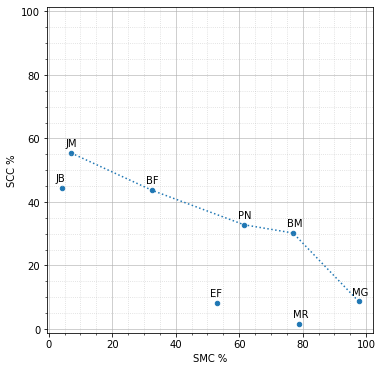

In [96]:
pareto_front(leaders)

# Eddington Number

The  physicist [Sir Arthur Eddington](https://en.wikipedia.org/wiki/Arthur_Eddington), a contemporary of Einstein, was a pre-Strava bicyclist who favored this metric:

> *Your [**Eddington Number**](https://www.triathlete.com/2011/04/training/measuring-bike-miles-eddington-number_301789) is the largest integer **e** such that you have cycled at least **e** miles on at least **e** days.*

My Eddington number progress over the years, in both kilometers and miles:

In [97]:
Ed_progress(rides)

,year,Ed_km,Ed_mi
,2023,101,67
,2022,96,66
,2021,93,65
,2020,87,62
,2019,80,56
,2018,77,54
,2017,73,51
,2016,67,47
,2015,61,42
,2014,46,35


My current Eddington Number is **101** in kilometers and **67** in miles: I've ridden at least 67 miles on at least 67 days (but not 68 miles on 68 days). My number is above [the median for Strava](https://swinny.net/Cycling/-4687-Calculate-your-Eddington-Number), but not nearly as good as Eddington himself: his number was **84** in miles when he died at age 62, and his roads, bicycles, and navigation aids were not nearly as nice as mine, so bravo zulu to him. 

How many more rides will I need to reach higher Eddington numbers? I call that the *Eddington Gap*:

In [98]:
Ed_gaps(rides)

,kms,km rides,kms gap,miles,miles rides,miles gap
,100,107,-7,67,74,-7
,101,105,-4,68,67,1
,102,99,3,69,54,15
,103,97,6,70,44,26
,104,91,13,71,37,34
,105,86,19,72,35,37
,106,83,23,73,32,41
,107,76,31,74,31,43
,108,73,35,75,24,51
,109,68,41,76,23,53


I need three 102-km rides to improve from 101 to 102; In miles, I need one 68-mile ride to improve from 67 to 68.

Here are some properties of Eddington numbers:
- Your Eddington number is monotonic: it can never decrease over time. 
- To improve from an Eddington number of *n* to *n* + 1 can take as few as 1 ride, or as many as *n* + 1 rides.
  + *Suppose you have done 9 rides, each of exactly 10 miles. Your Eddington number is 9.*
  + *You would need 1 ride of 10 miles to improve from a number of 9 to 10.*
  + *You would then need 11 rides of 11 miles to improve from a number 10 to 11.*
- Your metric Eddington number will always be greater than or equal to your imperial Eddington number.
- Your metric Eddington number will never be more than 1.609344 times your  imperial Eddington number.
- Of two riders, it is possible that one has a higher metric number and the other a higher imperial number.

*Note:* the definition of Eddington Number seems precise, but what exactly does ***day*** mean? The New Oxford dictionary has three senses:

1. *a period of 24 hours;*
2. *a unit of time, reckoned from one midnight to the next;*
3. *the part of a day when it is light.* 

I originally assumed sense 2, but I wanted to accept sense 1 for what [bikepackers](https://bikepacking.com/) call a [sub-24-hour overnight](https://oneofsevenproject.com/s24o-bikepacking-guide/) (S24O): a ride to a camping site in the afternoon, pitching a tent for the night, and returning back home the next morning.  And then COVID struck, the camping sites closed, so why not allow an S24O where I sleep in my own home? I realize Eddington had a lot more hardships than we have (World War I, the 1918 pandemic, and World War II, for example), but I hope he would approve of this modest accomodation on my part.

# Hill-Index: Speed versus Grade on Short Climbs

The Eddington number reminds me of the [**h-index**](https://en.wikipedia.org/wiki/H-index) metric for scientific publications. I invented another metric:

> *Your **hill-index** is the maximum integer **h** where you can regularly climb an **h** percent grade at **h** miles per hour.*

I'll plot grade versus speed for segments (not rides) with two best-fit curves: a blue quadratic and an orange cubic. I'll also superimpose a red dotted line where grade = speed.

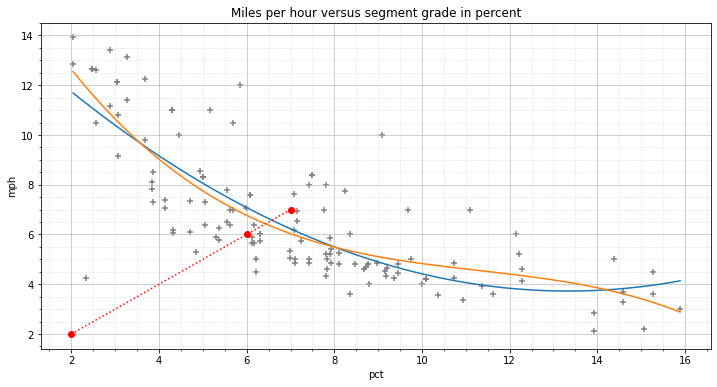

In [99]:
show('pct', 'mph', segments[segments.pct > 2], 
     'Miles per hour versus segment grade in percent')
plt.plot((2, 6, 7), (2, 6, 7), 'ro:');

Both  best-fit curves are above the red circle at 6% and below the red circle for 7%, so  **my hill-index is 6**. We also see that I can cruise at 14 mph on a 2% grade, but only about 7 mph at 6% grade, and around 5.5 mph on 8% grades.

 # Speed versus Grade on Long Rides

The plot above tell me how fast I should expect to climb a particular hill, but what about average time on longer rides? Here's a plot of my speed versus steepness (measured in feet climbed per mile rather than in percent).

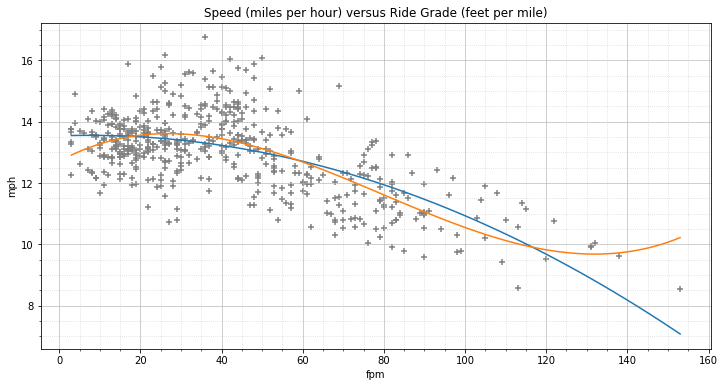

In [100]:
show('fpm', 'mph', rides, 'Speed (miles per hour) versus Ride Grade (feet per mile)')

So, I average a little under 14 mph when the overall route is fairly flat, with a lot of variability, depending more on my level of effort (and maybe the wind) than on the grade of the road. But when the grade is steeper than 50 ft/mile, my speed falls off quickly: down to 12mph at 80 ft/mile;  11 mph at 100 ft/mile; and around 10 mph at 120 ft/mile. Note that 120 ft/mile is only 2.3% grade, but if you figure a typical route is 1/3 up, 1/3 down, and 1/3 flat, then that's 7% average grade on the up part.

I can use this to predict the time of a ride.  For example, if I'm in  La Honda and want to get to Pescadero, which  way is faster: the [coast route](https://www.google.com/maps/dir/La+Honda,+California/Pescadero,+California/@37.2905834,-122.3896683,12z/data=!4m19!4m18!1m10!1m1!1s0x808faed4dc6265bd:0x51a109d3306a7219!2m2!1d-122.274227!2d37.3190255!3m4!1m2!1d-122.4039496!2d37.3116594!3s0x808f062b7d7585e7:0x942480c22f110b74!1m5!1m1!1s0x808f00b4b613c4c1:0x43c609077878b77!2m2!1d-122.3830152!2d37.2551636!3e1) (15.7 miles, 361 ft climb), or the  [creek route](https://www.google.com/maps/dir/La+Honda,+California/Pescadero,+California/@37.2905834,-122.3896683,12z/data=!4m19!4m18!1m10!1m1!1s0x808faed4dc6265bd:0x51a109d3306a7219!2m2!1d-122.274227!2d37.3190255!3m4!1m2!1d-122.3658887!2d37.2538867!3s0x808f00acf265bd43:0xb7e2a0c9ee355c3a!1m5!1m1!1s0x808f00b4b613c4c1:0x43c609077878b77!2m2!1d-122.3830152!2d37.2551636!3e1) (13.5 miles, 853 ft climb)? We can estimate:

In [101]:
f'Coast: {estimate(15.7, 361)} min, Creek: {estimate(13.5, 853)} min.'

'Coast: 70 min, Creek: 64 min.'

This predicts the shorter but steeper creek route would be about 6 minutes faster (whereas Google Maps predicts the creek route would be 80 minutes, 2 more than the coast route—I guess Google lacks confidence in my climbing ability).  This is all good to know, but other factors (like the scenery and whether I want to stop at the San Gregorio store) are probably more important in making the choice.

# VAM

Climbing speed measured by vertical ascent in meters per hour is known as [VAM](https://en.wikipedia.org/wiki/VAM_%28bicycling%29), which stands for *velocità ascensionale media* (for native Campagnolo speakers) or *vertical ascent in meters* (for SRAM) or 平均上昇率 (for Shimano), and sometimes by Vm/h. The theory is that for fairly steep climbs, most of your power is going into lifting against gravity, so your VAM should be about constant no matter what the grade. (For flatish climbs power is spent on wind and rolling resistance, and for the very steepest of climbs, in my experience,  power goes largely to cursing *sotto voce*, as they say in Italian.) 

Here's a plot of my VAM versus grade over short segments:

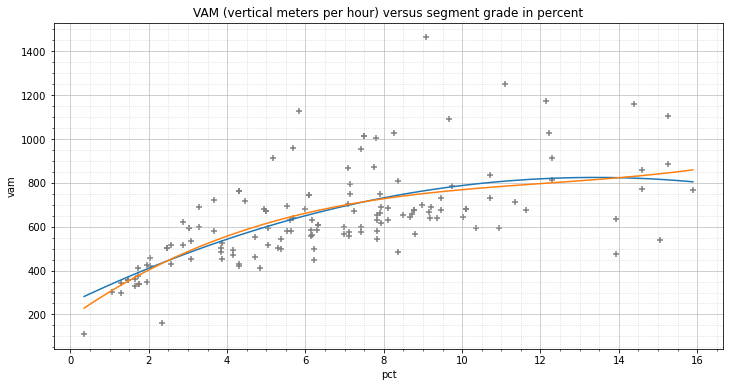

In [102]:
show('pct', 'vam', segments, 'VAM (vertical meters per hour) versus segment grade in percent')

Champion cyclists can do over 1800 meters/hour over a 10 km climb, and can sustain [1400 meters/hour for 7 hours](https://www.strava.com/activities/4996833865).  My VAM numbers range mostly from 400 to 900 meters/hour, but I can sustain the higher numbers for only a couple of minutes:

In [103]:
top(segments, 'vam')

,title,hours,miles,feet,mph,vam,fpm,pct,kms,km_up
14,Camaritas climb,0.01,0.10,48,10.00,1463.0,480.0,9.09,0.16,0.0
71,Paloma Climb,0.02,0.14,82,7.00,1250.0,586.0,11.09,0.23,0.0
55,Klamath Dr.,0.02,0.12,77,6.00,1173.0,642.0,12.15,0.19,0.0
28,Entrance Way Hill Repeats,0.02,0.10,76,5.00,1158.0,760.0,14.39,0.16,0.0
25,Davenport Kicker,0.02,0.24,74,12.00,1128.0,308.0,5.84,0.39,0.0
121,Valparaiso steep,0.04,0.18,145,4.50,1105.0,806.0,15.26,0.29,0.0
42,Invernes to Firecrest Climb,0.04,0.28,143,7.00,1090.0,511.0,9.67,0.45,0.0
54,Kings Mountain final sprint,0.04,0.31,135,7.75,1029.0,435.0,8.25,0.50,0.0
57,Limantour Spit,0.09,0.47,303,5.22,1026.0,645.0,12.21,0.76,0.1
115,Tunitas flattens,0.05,0.42,166,8.40,1012.0,395.0,7.49,0.68,0.1


On segments that are at least a kilometer long my VAM tops out at about 800 meters/hour:

In [104]:
top(segments[segments.kms >= 1], 'vam')

,title,hours,miles,feet,mph,vam,fpm,pct,kms,km_up
69,Old La Honda Mile 1,0.13,0.99,370,7.62,868.0,374.0,7.08,1.59,0.1
129,Westridge,0.14,0.68,385,4.86,838.0,566.0,10.72,1.09,0.1
67,Old La Honda (Bridge to Stop),0.48,3.33,1255,6.94,797.0,377.0,7.14,5.36,0.4
68,Old La Honda (Bridge to Stop),0.51,3.33,1255,6.53,750.0,377.0,7.14,5.36,0.4
130,Westridge,0.16,0.68,385,4.25,733.0,566.0,10.72,1.09,0.1
119,Tunitas steep,0.25,1.20,599,4.80,730.0,499.0,9.45,1.93,0.2
70,Old La Honda Mile 1,0.16,0.99,370,6.19,705.0,374.0,7.08,1.59,0.1
139,Woodside Climb,0.13,1.71,295,13.15,692.0,173.0,3.27,2.75,0.1
40,Huddart,0.17,0.92,385,5.41,690.0,418.0,7.93,1.48,0.1
111,Top of Groton Rd heading west,0.13,0.92,291,7.08,682.0,316.0,5.99,1.48,0.1


I can also look at VAM numbers for complete rides. I would expect the ride VAM to be half the segment VAM (or less) since most of my rides are circuits where I return to the start, and thus no more than half the ride is climbing. Sure enough, the best I can do is about 400 meters/hour:

In [105]:
top(rides, 'vam')

,date,year,title,hours,miles,feet,mph,vam,fpm,pct,kms,km_up
,"Sun, 11/29",2015,Mt. Hamilton,3.68,37.00,4902,10.05,406.0,132.0,2.51,59.53,1.5
,"Fri, 4/2",2021,Everesting 5: climb 2×(OLH + WOLH),3.27,31.48,4344,9.63,405.0,138.0,2.61,50.65,1.3
,"Tue, 3/30",2021,Everesting 2: Kings + WOLH + OLH,3.34,35.99,4377,10.78,399.0,122.0,2.30,57.91,1.3
,"Mon, 3/29",2021,Everesting 1: Mt Diablo,2.60,22.22,3406,8.55,399.0,153.0,2.90,35.75,1.0
,"Sat, 11/25",2017,Mt. Hamilton,3.69,36.65,4806,9.93,397.0,131.0,2.48,58.97,1.5
,"Sun, 12/1",2013,Mt. Hamilton,3.78,37.56,4921,9.94,397.0,131.0,2.48,60.43,1.5
,"Fri, 10/30",2015,OLH / West Alpine,3.48,39.51,4505,11.35,395.0,114.0,2.16,63.57,1.4
,"Sat, 4/26",2014,OLH / Tunitas Creek,5.26,58.69,6742,11.16,391.0,115.0,2.18,94.43,2.1
,"Sat, 4/18",2015,Tunitas + Lobitos Creeks,5.24,61.27,6611,11.69,385.0,108.0,2.04,98.58,2.0
,"Wed, 10/14",2015,Half Moon Bay,6.13,72.97,7644,11.90,380.0,105.0,1.98,117.41,2.3


# Exploring the Data


Some more ways to look at the data, both rides and segments.

In [106]:
rides.describe() # Summary statistics for the rides

,year,hours,miles,feet,mph,vam,fpm,pct,kms,km_up
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000
mean,2016.881801,3.331951,42.545122,1798.016886,12.976660,157.172608,41.409006,0.784090,68.454972,0.549719
std,2.425411,1.440025,17.205043,1476.608108,1.314215,89.830439,27.233909,0.515731,27.682874,0.451922
min,2012.000000,1.540000,20.960000,68.000000,8.550000,10.000000,3.000000,0.050000,33.720000,0.000000
25%,2015.000000,2.210000,28.870000,725.000000,12.160000,80.000000,19.000000,0.370000,46.450000,0.200000
50%,2017.000000,2.850000,36.650000,1355.000000,13.120000,152.000000,36.000000,0.690000,58.970000,0.400000
75%,2018.000000,4.220000,54.650000,2300.000000,13.770000,218.000000,56.000000,1.070000,87.930000,0.700000
max,2023.000000,8.140000,102.410000,7644.000000,16.750000,406.000000,153.000000,2.900000,164.780000,2.300000


In [107]:
segments.describe() # Summary statistics for the segments

,hours,miles,feet,mph,vam,fpm,pct,kms,km_up
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.141702,0.932979,268.978723,7.444539,641.893617,353.503546,6.694894,1.501064,0.073050
std,0.173711,0.989832,295.060659,3.557336,211.923595,186.816320,3.537974,1.592267,0.101334
min,0.010000,0.080000,21.000000,2.120000,111.000000,18.000000,0.350000,0.130000,0.000000
25%,0.050000,0.330000,104.000000,4.830000,503.000000,219.000000,4.140000,0.530000,0.000000
50%,0.090000,0.600000,166.000000,6.190000,630.000000,333.000000,6.300000,0.970000,0.100000
75%,0.150000,1.190000,303.000000,9.800000,724.000000,462.000000,8.760000,1.910000,0.100000
max,1.390000,7.380000,1887.000000,19.790000,1463.000000,839.000000,15.890000,11.870000,0.600000


In [108]:
top(rides, 'mph') # Fastest rides (of more than 20 miles)

,date,year,title,hours,miles,feet,mph,vam,fpm,pct,kms,km_up
,"Sun, 5/22",2016,Canada,2.19,36.68,1332,16.75,185.0,36.0,0.69,59.02,0.4
,"Wed, 9/13",2017,Healdburg / Jimtown,2.13,34.45,912,16.17,131.0,26.0,0.50,55.43,0.3
,"Sat, 1/25",2014,Woodside,1.56,25.08,1243,16.08,243.0,50.0,0.94,40.35,0.4
,"Sat, 4/11",2015,Woodside,1.54,24.73,1035,16.06,205.0,42.0,0.79,39.79,0.3
,"Sun, 7/11",2021,San Jose,4.10,65.10,1086,15.88,81.0,17.0,0.32,104.75,0.3
,"Sun, 1/18",2015,Woodside,1.64,26.02,1257,15.87,234.0,48.0,0.91,41.87,0.4
,"Fri, 6/24",2016,Foothill Expway,1.59,25.11,623,15.79,119.0,25.0,0.47,40.40,0.2
,"Sun, 1/26",2014,Canada Rd,2.10,33.12,1446,15.77,210.0,44.0,0.83,53.29,0.4
,"Fri, 1/6",2012,Omarama to Wanaka New Zealand,4.48,70.35,3262,15.70,222.0,46.0,0.88,113.19,1.0
,"Sun, 4/12",2015,Palo Alto Cycling,2.03,31.76,1210,15.65,182.0,38.0,0.72,51.10,0.4


In [109]:
top(segments, 'mph') # Fastest segments (there are no descent segments in the database)

,title,hours,miles,feet,mph,vam,fpm,pct,kms,km_up
76,PCH Pescadero to Bean Hollow,0.14,2.77,51,19.79,111.0,18.0,0.35,4.46,0.0
36,Highway 1 Cascanoa to Cascade,0.09,1.61,89,17.89,301.0,55.0,1.05,2.59,0.0
123,Vickrey Fruitvale,0.06,0.99,68,16.50,345.0,69.0,1.30,1.59,0.0
39,Highway 9 Mantalvo,0.03,0.45,35,15.00,356.0,78.0,1.47,0.72,0.0
38,Highway 9 Mantalvo,0.03,0.45,35,15.00,356.0,78.0,1.47,0.72,0.0
109,The Boneyard,0.10,1.48,135,14.80,411.0,91.0,1.73,2.38,0.0
124,Vickrey Fruitvale,0.07,0.99,68,14.14,296.0,69.0,1.30,1.59,0.0
90,Sand Hill Alpine to 280,0.12,1.67,180,13.92,457.0,108.0,2.04,2.69,0.1
15,Canada to College,0.10,1.37,119,13.70,363.0,87.0,1.65,2.20,0.0
30,Foothill Homestead,0.09,1.22,126,13.56,427.0,103.0,1.96,1.96,0.0


In [110]:
top(segments, 'feet') # Biggest climbing segments

,title,hours,miles,feet,mph,vam,fpm,pct,kms,km_up
128,West Alpine full,1.39,7.38,1887,5.31,414.0,256.0,4.84,11.87,0.6
51,Kings Greer to Skyline,0.78,3.92,1536,5.03,600.0,392.0,7.42,6.31,0.5
52,Kings Greer to Skyline,0.81,3.92,1536,4.84,578.0,392.0,7.42,6.31,0.5
67,Old La Honda (Bridge to Stop),0.48,3.33,1255,6.94,797.0,377.0,7.14,5.36,0.4
68,Old La Honda (Bridge to Stop),0.51,3.33,1255,6.53,750.0,377.0,7.14,5.36,0.4
0,Alma Mountain Charlie,0.53,3.12,875,5.89,503.0,280.0,5.31,5.02,0.3
47,Kings half way,0.46,2.89,820,6.28,543.0,284.0,5.37,4.65,0.2
48,Kings half way,0.50,2.89,820,5.78,500.0,284.0,5.37,4.65,0.2
5,Alpine Portola to top Joaquin,0.57,3.52,801,6.18,428.0,228.0,4.31,5.66,0.2
6,Alpine Portola to top Joaquin,0.58,3.52,801,6.07,421.0,228.0,4.31,5.66,0.2


In [111]:
top(segments, 'pct') # Steepest climbs

,title,hours,miles,feet,mph,vam,fpm,pct,kms,km_up
84,Redwood Gulch hits,0.06,0.18,151,3.00,767.0,839.0,15.89,0.29,0.0
121,Valparaiso steep,0.04,0.18,145,4.50,1105.0,806.0,15.26,0.29,0.0
122,Valparaiso steep,0.05,0.18,145,3.60,884.0,806.0,15.26,0.29,0.0
58,Limantour steepest,0.09,0.20,159,2.22,538.0,795.0,15.06,0.32,0.0
44,Joaquin,0.10,0.33,254,3.30,774.0,770.0,14.58,0.53,0.1
43,Joaquin,0.09,0.33,254,3.67,860.0,770.0,14.58,0.53,0.1
28,Entrance Way Hill Repeats,0.02,0.10,76,5.00,1158.0,760.0,14.39,0.16,0.0
102,Stirrup Wall,0.06,0.17,125,2.83,635.0,735.0,13.93,0.27,0.0
103,Stirrup Wall,0.08,0.17,125,2.12,476.0,735.0,13.93,0.27,0.0
131,Westridge 3min,0.08,0.37,240,4.62,914.0,649.0,12.29,0.60,0.1


In [112]:
top(rides, 'miles') # Longest rides

,date,year,title,hours,miles,feet,mph,vam,fpm,pct,kms,km_up
,"Fri, 1/9",2012,Otago Rail Trail Century,7.87,102.41,2286,13.01,89.0,22.0,0.42,164.78,0.7
,"Sat, 5/7",2022,Wine Country Century,6.65,100.26,5253,15.08,241.0,52.0,0.99,161.32,1.6
,"Thu, 6/14",2012,Coyote Creek Century with Juliet,8.14,100.07,1513,12.29,57.0,15.0,0.29,161.01,0.5
,"Sat, 5/13",2017,Morgan Hill iCare Classic,7.46,100.05,4596,13.41,188.0,46.0,0.87,160.98,1.4
,"Sat, 5/12",2018,"ICare Classic, Morgan Hill",6.80,91.29,4160,13.42,186.0,46.0,0.86,146.89,1.3
,"Sat, 5/6",2017,Wine Country Century,7.26,89.49,5246,12.33,220.0,59.0,1.11,143.99,1.6
,"Fri, 8/10",2018,Bike Ride Northwest Day 6,6.24,84.70,4380,13.57,214.0,52.0,0.98,136.28,1.3
,"Fri, 2/28",2020,Sawyer Camp Trail,6.41,84.43,3448,13.17,164.0,41.0,0.77,135.85,1.1
,"Wed, 6/7",2023,Los Altos,7.05,81.54,2110,11.57,91.0,26.0,0.49,131.20,0.6
,"Sun, 8/30",2020,Los Gatos,6.36,80.92,2100,12.72,101.0,26.0,0.49,130.20,0.6
